Pymaceuticals Inc.


Analysis

The drugs Capomulin and Ramicane seemed to lead to the smallest tumor volumes among the other regimens. They also had more timepoints run and that could have skewed the result in their favor.

While Ceftamin and Infubinol both had a smaller effect on tumor size, the former had a tighter variance in its distribution and the latter  had a noticeable negative lean to its distribution.

Mouse gender had little to no effect on the outcome of each medications efficiency in reducing tumor volume. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
complete_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
complete_study_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_study_df["Mouse ID"].duplicated()
# complete_study_df["Timepoint"].duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = pd.DataFrame(complete_study_df.loc[complete_study_df["Mouse ID"]=="g989",:])
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_study_df.drop(complete_study_df[complete_study_df["Mouse ID"]=="g989"].index, inplace = True)
complete_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
complete_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_stats = complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
# data_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
data_stats = data_stats[["mean", "std"]]
data_stats["median"] =  complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
data_stats["var"] =  complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
data_stats["sem"] =  complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
data_stats = data_stats[["mean", "median","var", "std","sem"]]
data_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
data_stats = data_stats[["mean", "std"]]
data_stats["median"] =  complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
data_stats["var"] =  complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
data_stats["sem"] =  complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
data_stats = data_stats[["mean", "median","var", "std","sem"]]
# Using the aggregation method, produce the same summary statistics in a single line.
data_stat_agg = complete_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
data_stat_agg

/Users/kyle/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kyle/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

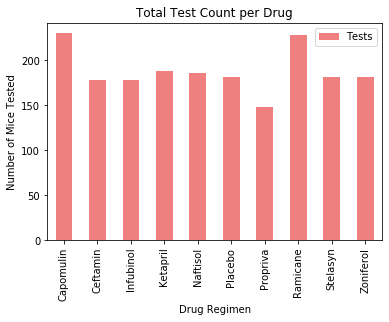

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_test_chart = complete_study_df.groupby("Drug Regimen").count()
pd_bar = drug_test_chart[["Mouse ID"]].rename(columns = {"Mouse ID":"Tests"})
pd_bar.plot(kind = "bar", alpha = 1, color="lightcoral")
plt.ylabel("Number of Mice Tested")
plt.title("Total Test Count per Drug")


plt.show()


In [78]:
drug_type = complete_study_df.groupby("Drug Regimen")
count_timepoint = drug_type ["Timepoint"].count()
count_timepoint

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

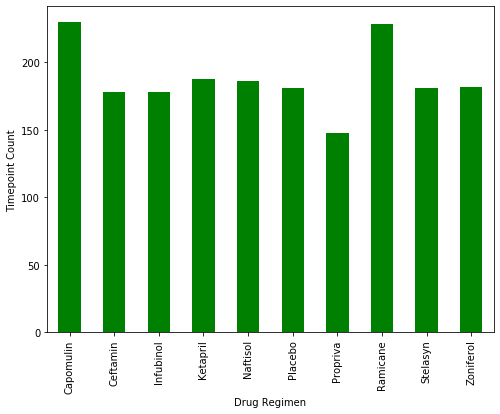

<Figure size 432x288 with 0 Axes>

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_timepoint_chart = count_timepoint.plot(kind="bar", figsize=(8,6), color="green")
drug_timepoint_chart.set_xlabel("Drug Regimen")
drug_timepoint_chart.set_ylabel("Timepoint Count")

plt.show()
plt.tight_layout()

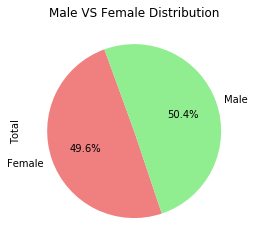

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist_df = complete_study_df.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()
gender_dist_df = gender_dist_df["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})
colors = ["lightcoral", "lightgreen"]
gender_dist_df.plot(kind = "pie", y = "Total", title = "Male VS Female Distribution",autopct="%1.1f%%", 
            shadow=False, startangle=110, colors = colors, legend = False).yaxis


Text(0.5, 1.0, 'Male VS Female Distribution')

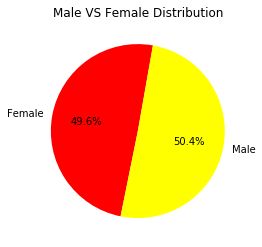

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = gender_dist_df.loc["Male", "Total"]
females = gender_dist_df.loc["Female", "Total"]
labels = gender_dist_df.index
colors = ["red", "yellow"]
sizes = [females, males]
plt.pie(sizes,labels=labels, colors = colors,
autopct="%1.1f%%", shadow=False, startangle=80)
plt.title("Male VS Female Distribution")

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
CIRC_regimen = complete_study_df.set_index("Drug Regimen").loc[["Capomulin","Ramicane",
                                  "Infubinol","Ceftamin"]].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
CIRC_regimen = CIRC_regimen.groupby("Mouse ID")["Timepoint"].max()
CIRC_regimen = pd.DataFrame(CIRC_regimen).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_study_df = pd.merge(complete_study_df, CIRC_regimen, on = ["Timepoint", "Mouse ID"])
merged_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_study_df["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
for t in treatment_list:
    for index, row in merged_study_df.iterrows():
        if row["Drug Regimen"] == t:
            tumor_volume.setdefault(t, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(tumor_volume)    
    
    # add subset 
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)    
    
    # Determine outliers using upper and lower bounds
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR is {IQR}")
print(f"Upper Outlier: {upper_bound}")
print(f"Lower Outlier: {lower_bound}")    

Lower Quartile: 37.187743802499995
Upper Quartile: 59.930261755000004
IQR is 22.74251795250001
Upper Outlier: 94.04403868375002
Lower Outlier: 3.0739668737499812


Text(0.5, 0, 'Drug Regimen')

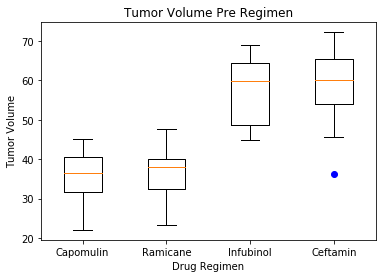

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], 
             frame["Infubinol"]], labels = treatment_list, sym = "blue")
plt.title("Tumor Volume Pre Regimen")
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")

## Line and Scatter Plots

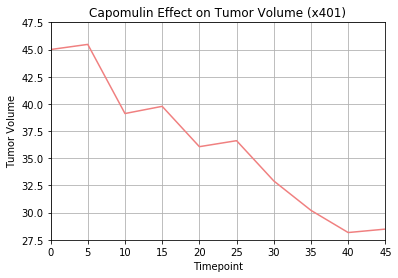

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_x401 = complete_study_df.loc[complete_study_df["Drug Regimen"] == 
            "Capomulin"].loc[complete_study_df["Mouse ID"] == "x401"]
x_axis = mouse_x401["Timepoint"].tolist()
y_axis = mouse_x401["Tumor Volume (mm3)"].tolist()
plt.plot(x_axis, y_axis, color="lightcoral")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Effect on Tumor Volume (x401)")
plt.xlim(0,45)
plt.ylim(27.5,47.5)
plt.grid()
plt.show()

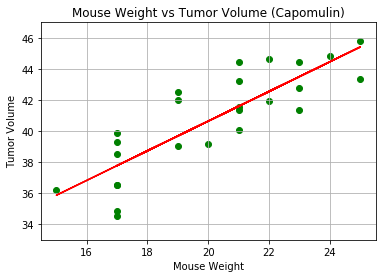

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_id = complete_study_df.loc[complete_study_df["Drug Regimen"] == 
           "Capomulin"].groupby("Mouse ID").mean()
x_axis = mouse_id["Weight (g)"]
y_axis = mouse_id["Tumor Volume (mm3)"]
mweight_tvolume = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
line_regression = x_axis * slope + intercept
plt.scatter(x_axis,y_axis, color="green")
plt.title("Mouse Weight vs Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.ylim(33,47)
plt.grid()
plt.plot(x_axis,line_regression, "r-")


## Correlation and Regression

Mouse Weight vs Tumor Volume Per Capomulin Drug Regimen
Correlation Coefficient: 0.84
Linear Regression Model: 0.95x + 21.55


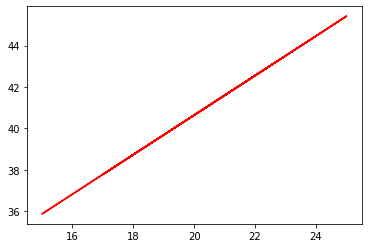

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print("Mouse Weight vs Tumor Volume Per Capomulin Drug Regimen")
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.plot(x_axis,line_regression, "r-")
print(f"Linear Regression Model: {round(slope, 2)}x + {round(intercept, 2)}")
